In [1]:
# Gradient Descent AND Stochastic Gradient Descent

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import random

In [3]:
df = pd.read_csv("D:\\Python\\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [5]:
scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X[:3]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ]])

In [6]:
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0], 1))
scaled_y[:3]

array([[0.05237037],
       [0.65185185],
       [0.22222222]])

In [7]:
def gradientDescent(X, y, learning_rate, epochs, isTrue):
    
    weights = np.ones(X.shape[1])
    bias = 0
    n = X.shape[0]

    cost_ = []
    count = []
    
    if isTrue:
        for i in range(1):
            y_pred = np.dot(weights, X.T) + bias

            dw = -(2/n)*(X.T.dot(y-y_pred))
            db = -(2/n)*np.sum(y-y_pred)

            weights = weights - learning_rate*dw
            bias = bias - learning_rate*db
            
            print(weights)

            cost = np.mean(np.square((y-y_pred)))

            if i%10 == 0:
                cost_.append(cost)
                count.append(i)
                print(f'Epoch: {i}, w1: {weights[0]}, w2: {weights[1]}, bias: {bias}, cost: {cost}')    
    
    else:
        for i in range(epochs):
            y_pred = np.dot(weights, X[random.randint(0, n-1)].T) + bias

            dw = -(2/n)*(X[random.randint(0, n-1)].T.dot(y[random.randint(0, n-1)]-y_pred))
            db = -(2/n)*np.sum(y[random.randint(0, n-1)]-y_pred)

            weights = weights - learning_rate*dw
            bias = bias - learning_rate*db

            cost = np.mean(np.square((y[random.randint(0, n-1)]-y_pred)))

            if i%100 == 0:
                cost_.append(cost)
                count.append(i)
                print(f'Epoch: {i}, w1: {weights[0]}, w2: {weights[1]}, bias: {bias}, cost: {cost}')

    return weights, bias, cost_, count
                
# FOR BATCH GRADIENT DESCENT
weights, bias, cost_, count = gradientDescent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 0.01, 500, True)

# FOR STOCHASTIC GRADIENT DESCENT
# weights, bias, cost_, count = gradientDescent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 0.01, 10000, False)

[0.99551317 0.99445655]
Epoch: 0, w1: 0.9955131745567446, w2: 0.9944565536398468, bias: -0.009603223499361428, cost: 0.2768777174681


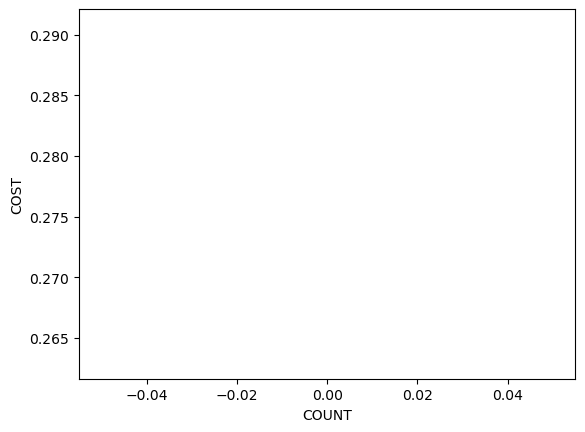

In [8]:
plt.xlabel("COUNT")
plt.ylabel("COST")
plt.plot(count, cost_)

In [29]:
def predict(area, rooms):
    scaled_X = sx.transform([[area, rooms]])[0]
    price = weights[0]*scaled_X[0] + weights[1]*scaled_X[1] + bias
    return sy.inverse_transform([[price]])
    
predict(1056, 2)[0][0]

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


76.13024431040726